## API mini project

For this project we are asked to complete a series of tasks involving financial data that is pulled from the quandl website.  
We will be looking at data from the Frankfurt Stock Exhange (FSE), specifically the company Carl Zeiss Meditec, which manufactures 
tools for eye examinations, as well as medical lasers for laser eye surgery.  The purpose of this project is to become familiar with 
the pythonrequest library and pulling data from web API's.  In addition we are discouraged from using the pandas library to complete the
analysis, in favor of functionality of the python standard library.  The task which are to be completed are as follows:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7 . (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

I have completed these tasks twice, with and without the pandas library.  I have chosen to do this to be able to cross reference the solutions.


In [66]:
#Import packages

import requests
import json

In [67]:
#create authroization key and url variables

API_KEY = ''
URL_TEST = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2020-04-22&end_date=2020-04-23&api_key='+API_KEY
URL = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key='+API_KEY

In [68]:
#print the http response and text of the test url containing 1 day of data
t_res = requests.get(URL_TEST)
print(t_res)
print(t_res.text)

<Response [200]>
{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2020-04-21) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2020-05-05T22:16:18.378Z","newest_available_date":"2020-05-05","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2020-04-22","end_date":"2020-04-23","data":[["2020-04-23",94.75,95.5,92.7,94.8,null,123862.0,11684265.45,null,null,null],["2020-04-22",92.75,94.65,91.6,94.65,null,126830.0,11898048.5,null,null,null]],"collapse":null,"order":null,"database_id":6129}}


In [69]:
#create dictionary from jason object and assign to: sample
#print sample and investigate dictionary structure

sample = t_res.json()
sample

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-04-21) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-05-05T22:16:18.378Z',
  'newest_available_date': '2020-05-05',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2020-04-22',
  'end_date': '2020-04-23',
  'data': [['2020-04-23',
    94.75,
    95.5,
    92.7,
    94.8,
    None,
    123862.0,
    11684265.45,
    None,
    None,
    None],
   ['2020-04-22',
    92.75,
    94.65,
    91.6,
    94.65,
    None

In [70]:
#retrieve data of full year 2017
#print http response to verify function

response = requests.get(URL)
print(response)

<Response [200]>


In [71]:
#create dictionary from json object and assign to y_2017
#print type and length of object

y_2017 = response.json()
print(type(y_2017))
print(len(y_2017['dataset']['data']))

<class 'dict'>
255


In [72]:
#construct dictionary so that column names are used as keys and data is stored as values

columns = y_2017['dataset']['column_names']
data = y_2017['dataset']['data']

dictionary = []
for data in data:
    dictionary.append(dict(zip(columns,data)))

In [73]:
#Check constructed dictionary for correct form

dictionary[0:3]

[{'Date': '2017-12-29',
  'Open': 51.76,
  'High': 51.94,
  'Low': 51.45,
  'Close': 51.76,
  'Change': None,
  'Traded Volume': 34640.0,
  'Turnover': 1792304.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-12-28',
  'Open': 51.65,
  'High': 51.82,
  'Low': 51.43,
  'Close': 51.6,
  'Change': None,
  'Traded Volume': 40660.0,
  'Turnover': 2099024.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None},
 {'Date': '2017-12-27',
  'Open': 51.45,
  'High': 51.89,
  'Low': 50.76,
  'Close': 51.82,
  'Change': None,
  'Traded Volume': 57452.0,
  'Turnover': 2957018.0,
  'Last Price of the Day': None,
  'Daily Traded Units': None,
  'Daily Turnover': None}]

In [74]:
#Use list comprehensions to create lists containg corresponding values

opens = [dictionary[i]['Open'] for i in range(0,255)]
high = [dictionary[i]['High'] for i in range(0,255)]
low = [dictionary[i]['Low'] for i in range(0,255)]
close = [dictionary[i]['Close'] for i in range(0,255)]
volume = [dictionary[i]['Traded Volume'] for i in range(0,255)]

In [75]:
#A few days of open price were missing, create new list with no empty values
#Use python functions to calculate min/max opening prices and average daily traded volume

open1 = [i for i in opens if i]
print(f'The highest opening price in 2017 was ${max(open1)}. The lowest opening price of 2017 was ${min(open1)}')
print(f'The average daily trading volume for the year 2017 was {round(sum(volume)/len(volume),2)} units')

The highest opening price in 2017 was $53.11. The lowest opening price of 2017 was $34.0
The average daily trading volume for the year 2017 was 89124.34 units


In [76]:
#loop through dictionary to calculate difference between high and low opening price
#store values in a list and use max function to fund largest value.

diff = []
for i in range(0,254):
    diff.append(round(dictionary[i]['High']-dictionary[i]['Low'],4))
    
print(f'The largest price change in any one day in 2017 was ${max(diff)}')

The largest price change in any one day in 2017 was $2.81


In [77]:
#Loop through dictionary to find largest closing price delta between to days
#Store values in a list and use max function to determine the largest price change

diff_between_days = []
for i in range(0,254):
    diff_between_days.append(round(dictionary[i]['Close']-dictionary[i+1]['Close'],4))
    
magnitude = [abs(ele) for ele in diff_between_days]
print(f'The largest change between any two days in 2017 was ${max(magnitude)}')

The largest change between any two days in 2017 was $2.56


In [78]:
#Create user- defined function to calculate median traded volume

n = len(volume)
volume.sort()

if n % 2 == 0:
    median1 = volume[n//2]
    median2 = volume[n//2 - 1]
    median = (median1 + median2)/2
else:
    median = volume[n//2]
print(f'The median daily volume traded for the year 2017 is {median} units')

The median daily volume traded for the year 2017 is 76286.0 units


## Using the pandas package

In an effort to validate the analysis from above, I am using the pandas package to perform the same anaylsis to cross-reference the answers. I also included two visualizations: one showing the open price with 5 and 10 day rolling means, and another showing the daily trading volume.





In [79]:
#Import pandas and create dataframe

import pandas as pd
data1 = y_2017['dataset']['data']
df = pd.DataFrame(data = data1,columns=columns)

In [80]:
#Drop unnecessary columns

df = df.drop(['Last Price of the Day','Daily Traded Units','Daily Turnover'],axis=1)

In [81]:
#inspect head of df

df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover
0,2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0
1,2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0
2,2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0
3,2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0
4,2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0


In [82]:
#reset index to the date column

df = df.set_index('Date')

In [83]:
df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover
Date,,,,,,,
2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0
2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0
2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0
2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0
2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0


In [84]:
#Use pandas functionality to verify previous calculations

max_open = df['Open'].max()
max_open_day = df['Open'].idxmax()
min_open = df['Open'].min()
min_open_day = df["Open"].idxmin()
avg_volume = df['Traded Volume'].sum() / len(df['Traded Volume'])

print(f'The highest open price in 2017 was {max_open}, and occured on {max_open_day}')
print(f'The lowest open price in 2017 was {min_open}, it occured on {min_open_day}')
print(f'The average daily volume traded in 2017 was {round(avg_volume,2)}')

The highest open price in 2017 was 53.11, and occured on 2017-12-14
The lowest open price in 2017 was 34.0, it occured on 2017-01-24
The average daily volume traded in 2017 was 89124.34


In [85]:
#Calculate day over day change with closing price
#add column to dataframe

df['Two_Change'] = abs(df['Close'].shift(1) - df['Close'])

In [86]:
day_over_day_change = df['Two_Change'].max()
occured = df['Two_Change'].idxmax()

print(f' The two consecutive days in which the closing price changed the most was {occured}, it was a delta of ${round(day_over_day_change,2)}')

 The two consecutive days in which the closing price changed the most was 2017-08-08, it was a delta of $2.56


In [87]:
#calculate largest daily change and 
#add column to dataframe

df['Change'] = df['High'] - df['Low']

In [88]:
#Calculate largest daily fluctuation

max_daily_fluctuation = df['Change'].max()
occured_on = df['Change'].idxmax()

print(f' The largest daily fluctuation in 2017 was ${round(max_daily_fluctuation,2)}, and occured on {occured_on}')

 The largest daily fluctuation in 2017 was $2.81, and occured on 2017-05-11


In [90]:
#calculate median with pandas

df['Traded Volume'].median()

76286.0

In [61]:
#import packages to make visualizations


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
sns.set_style('darkgrid')

In [62]:
df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover,Two_Change
Date,,,,,,,,,,,
2017-12-29,51.76,51.94,51.45,51.76,0.49,34640.0,1792304.0,None,None,None,NaN
2017-12-28,51.65,51.82,51.43,51.60,0.39,40660.0,2099024.0,None,None,None,0.16
2017-12-27,51.45,51.89,50.76,51.82,1.13,57452.0,2957018.0,None,None,None,0.22
2017-12-22,51.05,51.50,50.92,51.32,0.58,71165.0,3641949.0,None,None,None,0.50
2017-12-21,51.16,51.52,50.90,51.40,0.62,120649.0,6179433.0,None,None,None,0.08


In [63]:
#Dinctionary is in reverse order, we need to set correctly to get meaningful accurate visualizations

df1 = df.reindex(index=df.index[::-1])
df1.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover,Two_Change
Date,,,,,,,,,,,
2017-01-02,34.99,35.94,34.99,35.80,0.95,44700.0,1590561.0,None,None,None,0.32
2017-01-03,35.90,35.93,35.34,35.48,0.59,70618.0,2515473.0,None,None,None,0.29
2017-01-04,35.48,35.51,34.75,35.19,0.76,54408.0,1906810.0,None,None,None,0.13
2017-01-05,35.02,35.20,34.73,35.06,0.47,48412.0,1692326.0,None,None,None,0.02
2017-01-06,34.91,35.21,34.91,35.04,0.30,27507.0,964046.0,None,None,None,0.37


Text(0, 0.5, 'Price ($)')

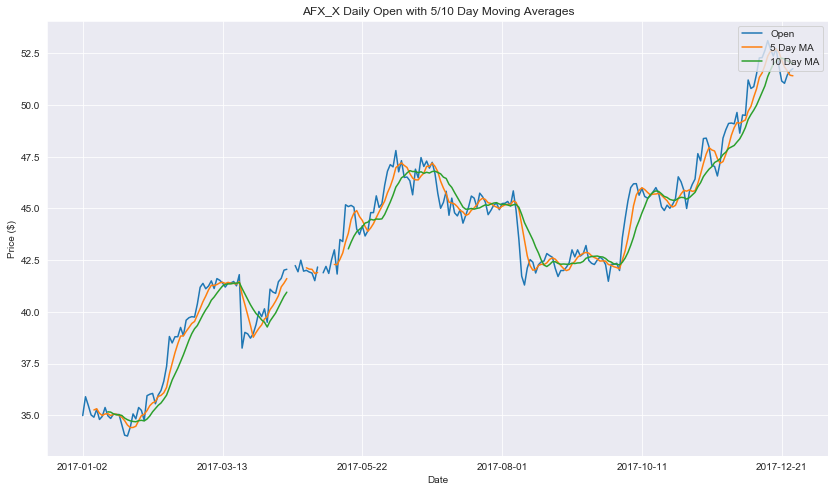

In [64]:
#plot daily opening price with 5 and 10 day moving averages

plt.figure(figsize=(14,8))
df1['Open'].plot(label='Open')
df1['Open'].rolling(5).mean().plot(label='5 Day MA')
df1['Open'].rolling(10).mean().plot(label='10 Day MA')
plt.title('AFX_X Daily Open with 5/10 Day Moving Averages')
plt.legend(loc='upper right')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Trading Volumne')

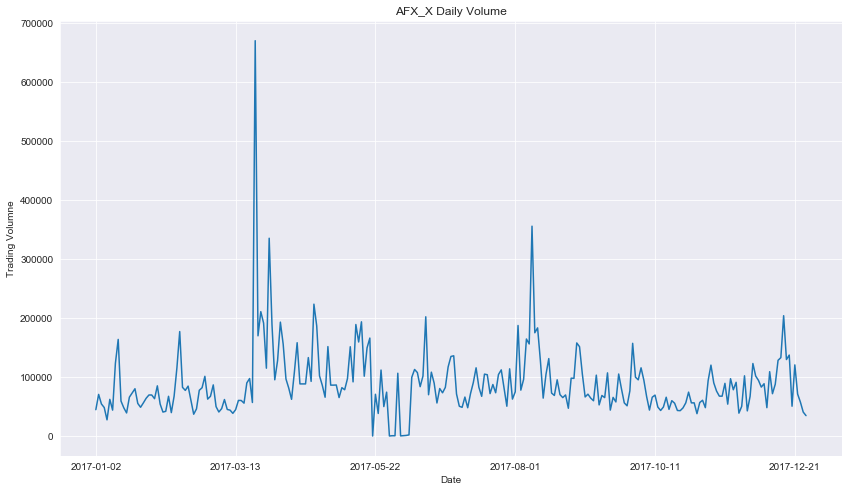

In [65]:
#plot daily trading volume

plt.figure(figsize=(14,8))
df1['Traded Volume'].plot()
plt.title("AFX_X Daily Volume")
plt.ylabel('Trading Volumne')